In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [155]:
data= pd.read_csv('nba-players.csv') 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1340 non-null   int64  
 1   name         1340 non-null   object 
 2   gp           1340 non-null   int64  
 3   min          1340 non-null   float64
 4   pts          1340 non-null   float64
 5   fgm          1340 non-null   float64
 6   fga          1340 non-null   float64
 7   fg           1340 non-null   float64
 8   3p_made      1340 non-null   float64
 9   3pa          1340 non-null   float64
 10  3p           1340 non-null   float64
 11  ftm          1340 non-null   float64
 12  fta          1340 non-null   float64
 13  ft           1340 non-null   float64
 14  oreb         1340 non-null   float64
 15  dreb         1340 non-null   float64
 16  reb          1340 non-null   float64
 17  ast          1340 non-null   float64
 18  stl          1340 non-null   float64
 19  blk   

In [156]:
data.head(10)

,Unnamed: 0,name,gp,min,pts,fgm,fga,fg,3p_made,3pa,...,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
0,0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1
5,5,Tony Bennett,75,11.4,3.7,1.5,3.5,42.3,0.3,1.1,...,0.5,73.2,0.2,0.7,0.8,1.8,0.4,0.0,0.7,0
6,6,Don MacLean,62,10.9,6.6,2.5,5.8,43.5,0.0,0.1,...,1.8,81.1,0.5,1.4,2.0,0.6,0.2,0.1,0.7,1
7,7,Tracy Murray,48,10.3,5.7,2.3,5.4,41.5,0.4,1.5,...,0.8,87.5,0.8,0.9,1.7,0.2,0.2,0.1,0.7,1
8,8,Duane Cooper,65,9.9,2.4,1.0,2.4,39.2,0.1,0.5,...,0.5,71.4,0.2,0.6,0.8,2.3,0.3,0.0,1.1,0
9,9,Dave Johnson,42,8.5,3.7,1.4,3.5,38.3,0.1,0.3,...,1.4,67.8,0.4,0.7,1.1,0.3,0.2,0.0,0.7,0


# Checking the dataset distribution 

In [157]:
data['target_5yrs'].value_counts()/len(data)

1    0.620149
0    0.379851
Name: target_5yrs, dtype: float64

# Seperating dependent and independent variable

In [158]:
X=data.drop(columns=['target_5yrs','Unnamed: 0','name'])
Y=data['target_5yrs']

# Scaling the dataset

In [159]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

# Splitting the dataset

In [160]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(scaled_X,Y,train_size=0.70,stratify=Y,random_state=101)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((937, 19), (403, 19), (937,), (403,))

# Model Building, predictions and odds ratio

In [161]:
from sklearn.linear_model import LogisticRegression as LR
classifier=LR(class_weight='balanced')
classifier.fit(x_train,y_train)
predicted_values=classifier.predict(x_test)
predicted_probabilities=classifier.predict_proba(x_test)
predicted_values
predicted_probabilities,predicted_probabilities.shape

(array([[0.26337347, 0.73662653],
        [0.32553298, 0.67446702],
        [0.18523551, 0.81476449],
        [0.48391829, 0.51608171],
        [0.63775103, 0.36224897],
        [0.27398334, 0.72601666],
        [0.21710826, 0.78289174],
        [0.47967057, 0.52032943],
        [0.47552058, 0.52447942],
        [0.48855207, 0.51144793],
        [0.25010342, 0.74989658],
        [0.19353861, 0.80646139],
        [0.70984813, 0.29015187],
        [0.67477481, 0.32522519],
        [0.84442007, 0.15557993],
        [0.19597084, 0.80402916],
        [0.03188988, 0.96811012],
        [0.62846059, 0.37153941],
        [0.11390216, 0.88609784],
        [0.44580302, 0.55419698],
        [0.66207127, 0.33792873],
        [0.74569635, 0.25430365],
        [0.54936795, 0.45063205],
        [0.31721923, 0.68278077],
        [0.21867225, 0.78132775],
        [0.66946073, 0.33053927],
        [0.52147231, 0.47852769],
        [0.40316323, 0.59683677],
        [0.20552224, 0.79447776],
        [0.195

# Coefficients Plot

In [164]:
#arranging the data
c=classifier.coef_.reshape(-1)
x=X.columns
coeff_plot=pd.DataFrame({
    'coefficients':c,
    'variable':x
})
#sorting the values
coeff_plot=coeff_plot.sort_values(by='coefficients')
coeff_plot.head()

,coefficients,variable
7,-0.568219,3pa
13,-0.425020,dreb
10,-0.281568,fta
1,-0.238828,min
18,-0.228761,tov


Text(0.5, 1.0, 'Coefficients plot')

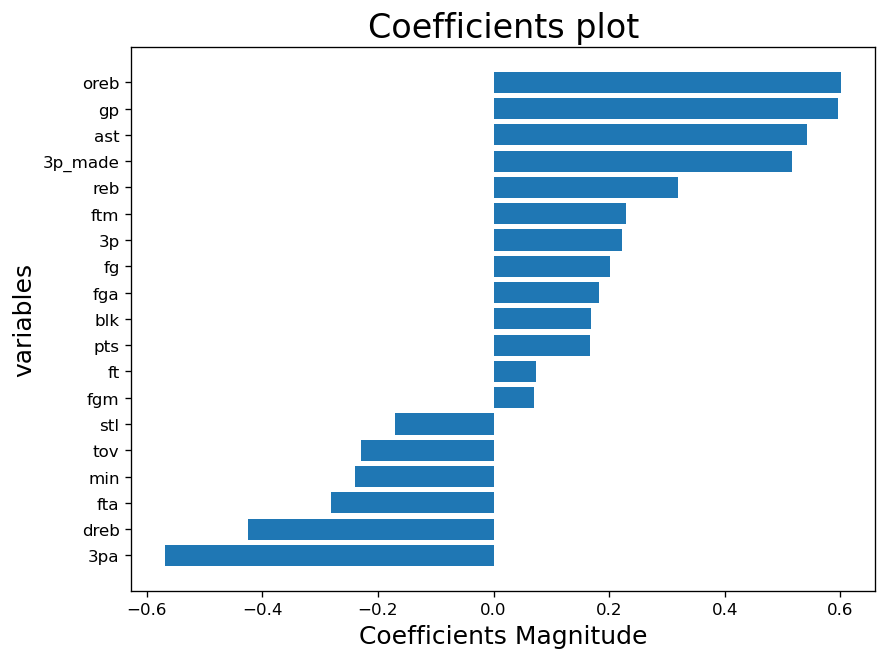

In [165]:
plt.figure(figsize=(8,6),dpi=120)
plt.barh(coeff_plot['variable'],coeff_plot['coefficients'])
plt.xlabel("Coefficients Magnitude",fontsize=15)
plt.ylabel('variables',fontsize=15)
plt.title('Coefficients plot',fontsize=20)

# Bagging

In [166]:
from sklearn.ensemble import BaggingClassifier as BC
classifier=BC()
classifier.fit(x_train,y_train)

BaggingClassifier()

In [167]:
from sklearn.linear_model import LogisticRegression as LR

classifier = BC(base_estimator=LR(),
               n_estimators=150,
               n_jobs=-1,
            random_state=42)
classifier.fit(x_train,y_train)
predicted_values=classifier.predict(x_train)

In [168]:
from sklearn.metrics import classification_report
print(classification_report(y_train,predicted_values))

              precision    recall  f1-score   support

           0       0.64      0.51      0.57       356
           1       0.73      0.82      0.77       581

    accuracy                           0.70       937
   macro avg       0.68      0.67      0.67       937
weighted avg       0.70      0.70      0.70       937



In [169]:
predicted_values=classifier.predict(x_test)
print(classification_report(y_test,predicted_values))

              precision    recall  f1-score   support

           0       0.67      0.59      0.63       153
           1       0.77      0.82      0.79       250

    accuracy                           0.73       403
   macro avg       0.72      0.71      0.71       403
weighted avg       0.73      0.73      0.73       403



# Confusion matrix

In [170]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test,predicted_values)
cf

array([[ 91,  62],
       [ 45, 205]])

1. Accuracy

In [171]:
classifier.score(x_test,y_test)

0.7344913151364765

2. Calculating the precision score

In [172]:
from sklearn.metrics import precision_recall_fscore_support as PRF_summary
precision,recall,f1,support=PRF_summary(y_test,predicted_values)

In [173]:
precision

array([0.66911765, 0.76779026])

In [174]:
recall

array([0.59477124, 0.82      ])

In [175]:
f1

array([0.62975779, 0.79303675])

In [176]:
support #support is nothing but the no of instances for class 1 and class 0

array([153, 250])

Only for representation

In [177]:
from sklearn.metrics import classification_report
k=classification_report(y_test,predicted_values)
print(k)

              precision    recall  f1-score   support

           0       0.67      0.59      0.63       153
           1       0.77      0.82      0.79       250

    accuracy                           0.73       403
   macro avg       0.72      0.71      0.71       403
weighted avg       0.73      0.73      0.73       403



# Precision-Recall Curve

In [178]:
#gathering Precision/recall scores from different threshold
from sklearn.metrics import precision_recall_curve
precision_points,recall_points,threshold_points=precision_recall_curve(y_test,predicted_probabilities[:,1])
precision_points.shape,recall_points.shape,threshold_points.shape

((400,), (400,), (399,))

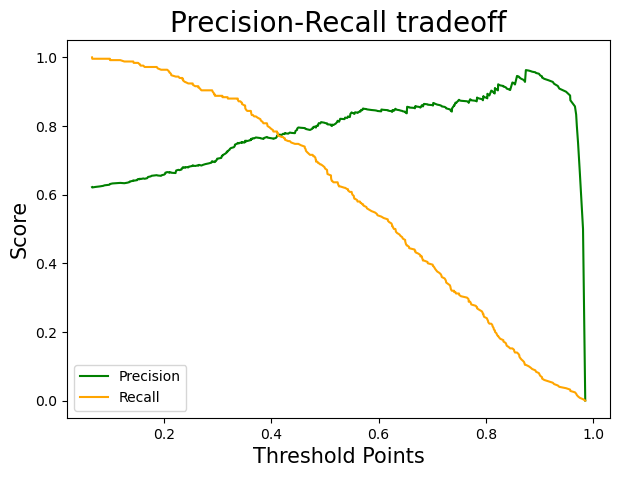

In [179]:
#compare if threshold is less than precision & recall 
#if less -1 minus in plotting
plt.figure(figsize=(7,5),dpi=100)
plt.plot(threshold_points,precision_points[:-1],color='green',label='Precision')
plt.plot(threshold_points,recall_points[:-1],color='orange',label='Recall')
plt.xlabel('Threshold Points',fontsize=15)
plt.ylabel('Score',fontsize=15)
plt.title('Precision-Recall tradeoff',fontsize=20)
plt.legend()

# AUC-ROC Curve

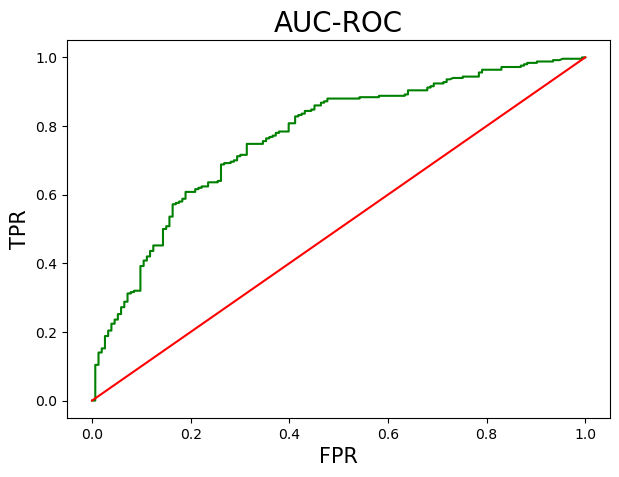

0.7682875816993464

In [180]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,threshold=roc_curve(y_test,predicted_probabilities[:,1])
plt.figure(figsize=(7,5),dpi=100)
plt.plot(fpr,tpr,color='green')
plt.plot([0,1],[0,1],label='baseline',color='red')
plt.xlabel('FPR',fontsize=15)
plt.ylabel('TPR',fontsize=15)
plt.title('AUC-ROC',fontsize=20)
plt.show()
roc_auc_score(y_test,predicted_probabilities[:,1])